# LSTM model training

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 121s 19ms/step - loss: 39.5014 - mae: 2.6429 - val_loss: 4.2511 - val_mae: 1.5458
Epoch 2/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 112s 18ms/step - loss: 6.4292 - mae: 1.6381 - val_loss: 3.6329 - val_mae: 1.4068
Epoch 3/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 112s 18ms/step - loss: 3.8480 - mae: 1.4496 - val_loss: 2.9914 - val_mae: 1.2782
Epoch 4/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - loss: 3.3605 - mae: 1.3479 - val_loss: 2.9086 - val_mae: 1.2668
Epoch 5/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 145s 18ms/step - loss: 2.9597 - mae: 1.2702 - val_loss: 2.7701 - val_mae: 1.2267
Epoch 6/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 140s 18ms/step - loss: 2.8632 - mae: 1.2352 - val_loss: 2.4323 - val_mae: 1.1427
Epoch 7/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 144s 18ms/step - loss: 2.7680 - mae: 1.1982 - val_loss: 2.4652 - val_mae: 1.1545
Epoch 8/300
6136/6136 ━━━━━━━━━━━━━━━━━━━━ 112s 18ms/step - loss: 2.6737 - mae: 1.1694 - val_loss: 2.2414 - val_mae: 1.1029
Epoch 9

R2 Score: 0.9640176928310404


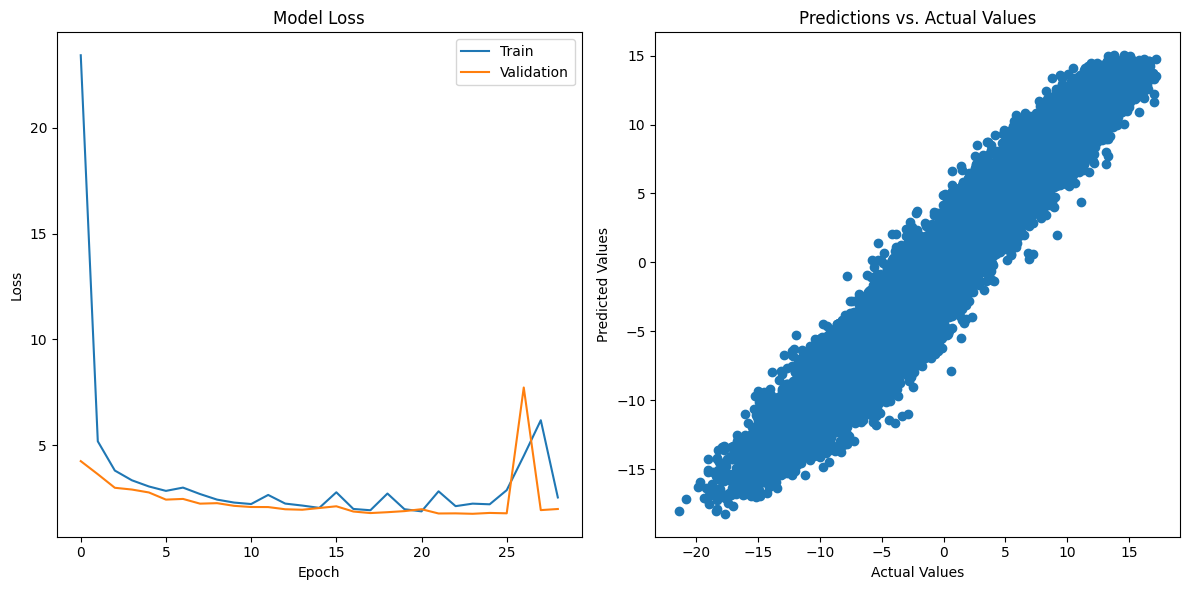

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set a random seed for reproducibility
np.random.seed(0)

# Mount Google Drive if not already done
from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/DataWind/2003_2022_kalinchowk.csv")

# Changing datatype from int to float
data["YEAR"] = data["YEAR"].astype(float)
data["MO"] = data["MO"].astype(float)
data["DY"] = data["DY"].astype(float)
data["HR"] = data["HR"].astype(float)
data.dropna(axis=0, inplace=True)

# Define features and target
X = data.drop(['T2M', 'RH2M', 'T2MDEW', 'T2MWET'], axis=1)
y = data['T2M']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the NN
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the ANN
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)

# Train the ANN
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, batch_size=16, epochs=300, callbacks=[early_stopping], validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print(f'Test Loss: {test_loss}')

# Calculate R-squared (R2) error
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot predictions vs. actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()

# Save the trained model
model.save('/content/drive/MyDrive/DataWind/your_model_name_kalinchowk_Temp.h5')


# LSTM model testing

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
✅ R-squared (R2) error: 0.84


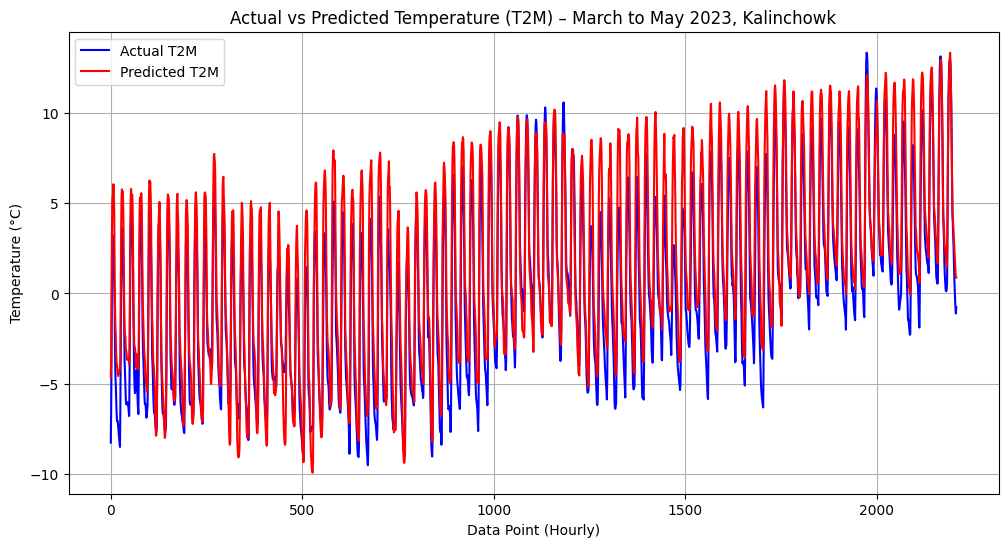

In [ ]:
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------------
# Load your trained model
# -----------------------------------
model = load_model('/content/drive/MyDrive/DataWind/your_model_name_kalinchowk_Temp.h5')

# -----------------------------------
# Load the data for March–May 2023
# -----------------------------------
data = pd.read_csv("/content/drive/MyDrive/DataWind/2023_mar-may_kalinchowk.csv")

# -----------------------------------
# Sort the data chronologically
# -----------------------------------
# Assuming columns: YEAR, MO (month), DY (day), HR (hour)
data = data.sort_values(by=['YEAR', 'MO', 'DY', 'HR']).reset_index(drop=True)

# -----------------------------------
# Extract the actual temperature (T2M)
# -----------------------------------
actual_T2M = data['T2M']

# Drop the target and correlated columns
data = data.drop(['T2M', 'RH2M', 'T2MDEW', 'T2MWET'], axis=1)

# -----------------------------------
# Load and prepare the training data
# -----------------------------------
training_data_path = "/content/drive/MyDrive/DataWind/2003_2022_kalinchowk.csv"
training_data = pd.read_csv(training_data_path)

# Ensure the same column order and features as the test data
training_data = training_data[data.columns]

# -----------------------------------
# Normalize features using the same scaling method as training
# -----------------------------------
scaler = StandardScaler()
scaler.fit(training_data)

# Apply scaling to the test (March–May 2023) data
X_test = scaler.transform(data)

# -----------------------------------
# Make predictions using the trained model
# -----------------------------------
predictions = model.predict(X_test)

# -----------------------------------
# Evaluate R² score
# -----------------------------------
r2 = r2_score(actual_T2M, predictions)
print(f"✅ R-squared (R2) error: {r2:.2f}")

# -----------------------------------
# Plot the actual vs predicted T2M values
# -----------------------------------
plt.figure(figsize=(12, 6))
plt.plot(actual_T2M.values, label='Actual T2M', color='blue')
plt.plot(predictions, label='Predicted T2M', color='red')
plt.title('Actual vs Predicted Temperature (T2M) – March to May 2023, Kalinchowk')
plt.xlabel('Data Point (Hourly)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
